In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'E:\download\INTERNSHIP\Spam-Project-23-11-22\spam.csv', encoding = 'latin')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
print(df.shape) # Dataset shape
df.v1.value_counts()

# Target feature is imbalanced

(5572, 5)


ham     4825
spam     747
Name: v1, dtype: int64

In [6]:
# Renaming feature
df.rename(columns = {'v1':'label','v2':'message'}, inplace=True)

In [7]:
# checking duplicated value and remove its
print(df.duplicated(subset= 'message').sum())
df = df.drop_duplicates(subset='message')
df.label.value_counts()

403


ham     4516
spam     653
Name: label, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5169 non-null   object
 1   message     5169 non-null   object
 2   Unnamed: 2  43 non-null     object
 3   Unnamed: 3  10 non-null     object
 4   Unnamed: 4  5 non-null      object
dtypes: object(5)
memory usage: 242.3+ KB


In [9]:
## These are unnecessary feature
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],1, inplace=True)

In [10]:

df.isnull().sum() # checking null value

label      0
message    0
dtype: int64

In [11]:
# making new column of message length
df['length']= df['message'].str.len()

In [12]:

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatize= WordNetLemmatizer()

In [13]:
stop_word= set(stopwords.words('english'))
stop_word.update(('u','n','r','nd', 'un','il','th','da','dont','co','uk', 'p','c'))

In [14]:
# let's Make a function for cleaning the text data
def clean_data(message):
    text= re.sub(r"n\'t", ' not', message)
    text= re.sub(r'http\S+|www.\S+', '', text) # remove hyperlink
    text= re.sub(r'\£+|\$+', ' dollars ', text)
    text=re.sub(r'\d{10,}', ' number ',text)
    text= re.sub(r"'", " ' ", text)
    text= re.sub(r'"', ' " ', text)  
    text= re.sub(r"\'ve", ' have', text)
    text= re.sub(r"\'m", ' am', text)
    text= re.sub(r"\'re", ' are', text)
    text= re.sub("\'s", 's', text)
    text= re.sub('[^A-Za-z]+',' ', text)
    text= re.sub("\s+",' ', text)         # remove extra spaces
    text = text.lower()  # converting into lower case
    return text

from tqdm import tqdm
preprocess=[]
for text in tqdm(df['message'].values):
    sent= clean_data(text)
    sent= ' '.join(e for e in sent.split() if e not in stop_word) #
    sent= ' '.join(lemmatize.lemmatize(e) for e in sent.split()) #
    preprocess.append(sent)
    
df['clean_text'] = preprocess

100%|████████████████████████████████████████████████████████████████████████████| 5169/5169 [00:01<00:00, 3389.09it/s]


In [15]:
#
print('original text =\n',df['message'][2], '\n')
print('After text preprocess =\n',df['clean_text'][2])

original text =
 Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

After text preprocess =
 free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate apply number


In [16]:
#
# making new column of clean message length
df['clean_text_length']= df['clean_text'].str.len()
df.head()

# 20 to 40 percent sentences length have reduced after text cleaning

,label,message,length,clean_text,clean_text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis great wo...,80
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif oni,21
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st ...,106
3,ham,U dun say so early hor... U c already then say...,49,dun say early hor already say,29
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think go usf life around though,35


In [ ]:
#

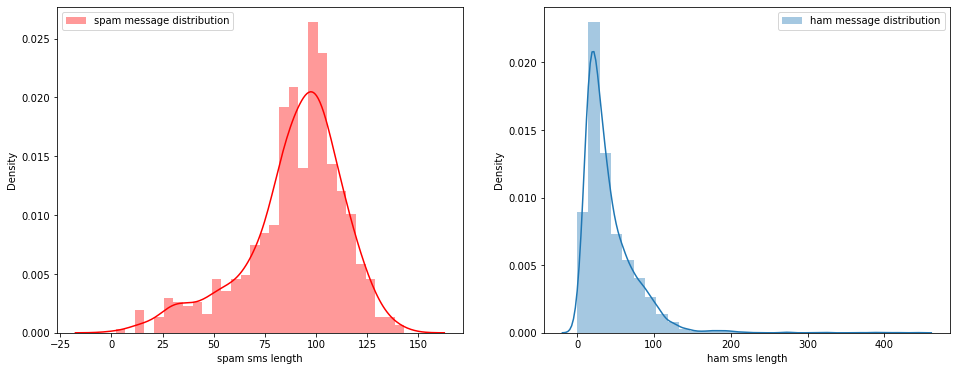

In [17]:
# Message distribution AFTER cleaning
import seaborn as sns

f,ax= plt.subplots(1,2,figsize=(16,6))

sns.distplot(df[df['label']=='spam']['clean_text_length'], bins=30, ax=ax[0], label='spam message distribution',color='r')
ax[0].set_xlabel('spam sms length')
ax[0].legend()

sns.distplot(df[df['label']=='ham']['clean_text_length'], bins=30, ax=ax[1], label='ham message distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()
plt.show()

In [ ]:
# maximum 'ham' sms length distribution is less than 100 , distrubtion looking skewed
# maximum 'spam'  sms legth distribution is falling between 25 to 125  , non skewed distribution

In [18]:

# replacing string value to integer value
df['label'].replace({'ham':0,'spam':1}, inplace=True)

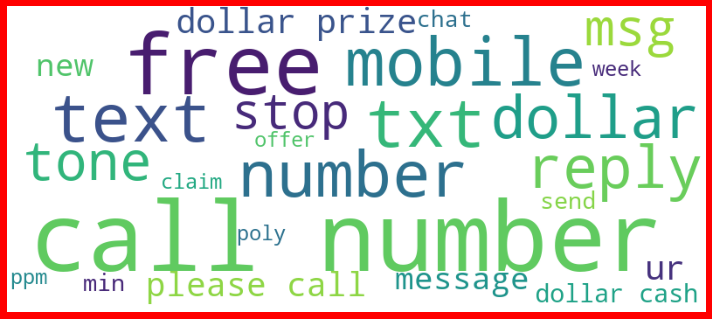

In [19]:
# GETTING SENSE OF CLOUD WORDS OF 'spam'
from wordcloud import WordCloud

spam= df['clean_text'][df['label']==1]
spam_cloud= WordCloud(width=800,height=350, background_color='white', max_words=25).generate(' '.join(spam))

plt.figure(figsize=(10,8), facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

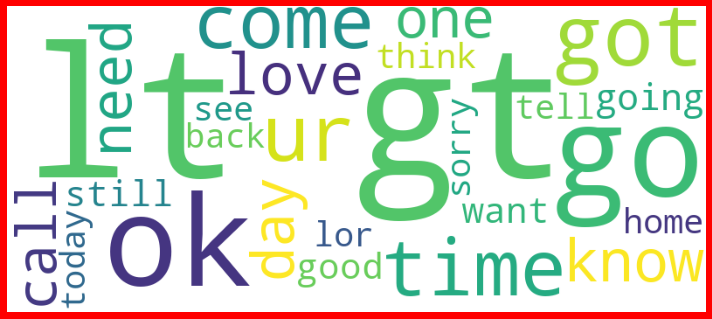

In [20]:

# GETTING SENSE OF CLOUD WORDS OF 'ham'
from wordcloud import WordCloud

spam= df['clean_text'][df['label']==0]
spam_cloud= WordCloud(width=800,height=350, background_color='white', max_words=25).generate(' '.join(spam))

plt.figure(figsize=(10,8), facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

# lET'S BUILD THE MODEL

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB

from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
# Splitting the dataset to Train & Test 

x_train,x_test, y_train,y_test = train_test_split(df['clean_text'], df['label'], 
                                                  test_size= 0.2, random_state=42)

In [23]:
y_test.value_counts()  # 

0    889
1    145
Name: label, dtype: int64

In [24]:
## Trained the model with MultinomialNB By sklearn Pipeline

from sklearn.pipeline import Pipeline

pipe_M = Pipeline([('tf_idf', TfidfVectorizer()),
                ('clf', MultinomialNB())])
pipe_M.fit(x_train, y_train)

y_pred = pipe_M.predict(x_test)
print('accuracy-score=', accuracy_score(y_test, y_pred))
print('classification_report \n', classification_report(y_test, y_pred))

accuracy-score= 0.9642166344294004
classification_report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.99      0.75      0.85       145

    accuracy                           0.96      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.96      0.96      1034



In [25]:
# CROSS VALIDATION 
from sklearn.model_selection import cross_val_score

MNB_cv = cross_val_score(pipe_M, x_train, y_train, cv = 10,n_jobs=-1).mean()
print('Multinomial cross validation score', MNB_cv)

Multinomial cross validation score 0.9622738065995252


In [26]:
# ## Trained the model with RANDOMFOERST_CLASSIFIER By Sklearn Pipeline
pipe_R = Pipeline([('tf_idf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1,oob_score=True,n_estimators=300))])
pipe_R.fit(x_train, y_train)

y_pred = pipe_R.predict(x_test)
print('accuracy-score=', accuracy_score(y_test, y_pred))
print('classification_report \n', classification_report(y_test, y_pred))
print('confusion_matrix \n', confusion_matrix(y_test, y_pred))

accuracy-score= 0.9729206963249516
classification_report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       1.00      0.81      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034

confusion_matrix 
 [[889   0]
 [ 28 117]]


In [27]:
# CROSS VALIDATION
rf_cv = cross_val_score(pipe_R, x_train, y_train, cv = 10,n_jobs=-1).mean()
print('RandomForest_Classifier cross validation score', rf_cv)


RandomForest_Classifier cross validation score 0.9748499842088642


In [ ]:
# From RandomFoerst Classifier accuracy get 1 percent more than MultinomialNB

In [28]:
y_pred = pipe_R.predict(x_test)

pred =pd.DataFrame({'y_test':y_test, 'predicted':y_pred})
pred.head(40)

,y_test,predicted
1617,0,0
2064,0,0
1272,0,0
3020,0,0
3642,0,0
1520,1,1
1159,0,0
3986,1,1
3217,0,0
539,0,0



# ##            SAVE RandomForest  MODEL 


In [29]:
import pickle

spam_detect = 'spam_detect.pickle'
pickle.dump(pipe_R, open(spam_detect, 'wb'))

In [30]:
## Make a function to predict sms that 'ham' or 'spam'
from sklearn.feature_extraction.text import TfidfVectorizer
model = pickle.load(open(spam_detect, 'rb'))

def spam_detection(message):

    result = model.predict([message])
    #return result
    if result == 0:
        print('ham')
    else:
        print('spam')

In [35]:
result = spam_detection('pas dis ur contact see wat get red luv wid blue put smile face purple \
realy hot pink swt orange thnk lyk green realy wana go wid yelow wnt bck black jealous brown miss \
nw plz giv one color')
result

ham


In [34]:
print(x_test[2064])
y_test[2064]

pas dis ur contact see wat get red luv wid blue put smile face purple realy hot pink swt orange thnk lyk green realy wana go wid yelow wnt bck black jealous brown miss nw plz giv one color


0